# Aprendizaje no supervisado

El objetivo del aprendizaje no supervisado es determinar la agrupación de los datos de entrada basado en alguna medida de similitud. Los algoritmos más comunes en el aprendizaje no supervisado son *K-Means* y *GMM*. Aunque ambos determinan los *clusters* o agrupaciones de los datos, difieren en los parámetros de conformación del *cluster*

## *K-Means*
El algoritmo *K-Means* utiliza la distancia Euclidea para conformar las agrupaciones de los datos. La idea entonces en generar un *centroide* para cada grupo, de tal forma que la distancia entre centroides sea máxima mientras la distancia del centroide a los demás elementos del mismo grupo sea mínima.

In [53]:
#importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


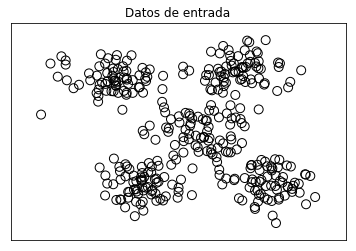

In [8]:
#importamos los datos
X = np.loadtxt('data_clustering.txt',delimiter = ',')
#graficamos la información de entrada
plt.figure() #instanciamos la figura
plt.scatter(X[:,0], X[:,1], marker = 'o', facecolors = 'none',
           edgecolors = 'black', s = 80 ) #gráfico por muestras
x_min, x_max = X[:,0].min()-1 , X[:,0].max()+1 #fijamos el rango del eje x
y_min, y_max = X[:,1].min()-1 , X[:,1].max()+1 #fijamos el rango del eje y
plt.title('Datos de entrada')
plt.xlim(x_min, x_max) #límites para el eje x
plt.ylim(y_min, y_max) #límites para el eje y
plt.xticks(()) #eliminamos los números del eje x
plt.yticks(()) #eliminamos los números del eje y
plt.show() #visualizamos al figura

In [59]:
#particionamos los datos
vector = np.arange(0,350) 
np.random.seed(0)
y = np.random.permutation(350)
X_train = X[y[0:280],:]
X_test = X[y[280:351],:]
print(X_train.shape, X_test.shape)

(280, 2) (70, 2)


In [60]:
#ajustamos los parámetros del K-Means
num_clusters = 5
#instanciamos el algoritmo
kmeans = KMeans(init = 'k-means++', n_clusters = num_clusters,
               n_init = 10) #n_init es el número de iteraciones para que
#fije los centroides
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
#validamos el algoritmo
kmeans.predict(X_test)


array([0, 1, 0, 4, 3, 2, 3, 3, 1, 1, 4, 3, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 3, 4, 1, 3, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 4, 1, 0, 2, 2,
       1, 2, 2, 2, 4, 1, 4, 0, 4, 0, 2, 1, 1, 1, 1, 3, 4, 2, 3, 0, 1, 3, 1,
       1])

## GMM
El algoritmo de clustering de Mezclas de Gaussianas, permite agrupar los datos basándose en la premisa de que la función de densidad de probabilidad es Gaussiana, por tanto  los conjuntos se pueden modelar como una mezcla de estas funciones de densidad:

$$p_{X}(x) = \frac{1}{\sqrt(2\pi\sigma^2)}\exp(-\frac{(x-m_X)^2}{2\sigma^2})$$

In [66]:
from sklearn.mixture import GMM #librería para GMM
#instanciamos el algoritmo
gmm = GMM(n_components = num_clusters, covariance_type = 'full', 
         init_params = 'wc', n_iter = 20) #cálculo de parámetros con EM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [71]:
#entrenamos el algoritmo
gmm.fit(X_train)
#validamos el algoritmo
#print(gmm.means_)
y = gmm.predict(X_test)
print(y)

[0 4 0 2 1 3 1 1 4 4 2 1 4 4 3 4 3 0 0 0 4 4 0 3 0 0 0 1 2 4 1 4 4 3 3 0 4
 4 3 3 4 2 2 0 3 3 4 3 3 3 2 4 2 0 2 0 3 4 4 4 4 1 2 3 1 0 4 1 4 4]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:7